In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import miscel_tool

%load_ext autoreload
%autoreload 2

# read train 2

In [2]:
train_2_path = 'web_traffic_data/train_2.csv'
df_train = pd.read_csv(train_2_path)
df_train = miscel_tool.split_page_underscore(df_train)
df_train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,title,project,device,agent
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,16.0,27.0,29.0,23.0,54.0,38.0,2NE1,zh.wikipedia.org,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,54.0,25.0,26.0,23.0,13.0,81.0,2PM,zh.wikipedia.org,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,7.0,3.0,4.0,7.0,6.0,3C,zh.wikipedia.org,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,6.0,16.0,19.0,30.0,38.0,4.0,4minute,zh.wikipedia.org,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,23.0,28.0,14.0,8.0,7.0,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider


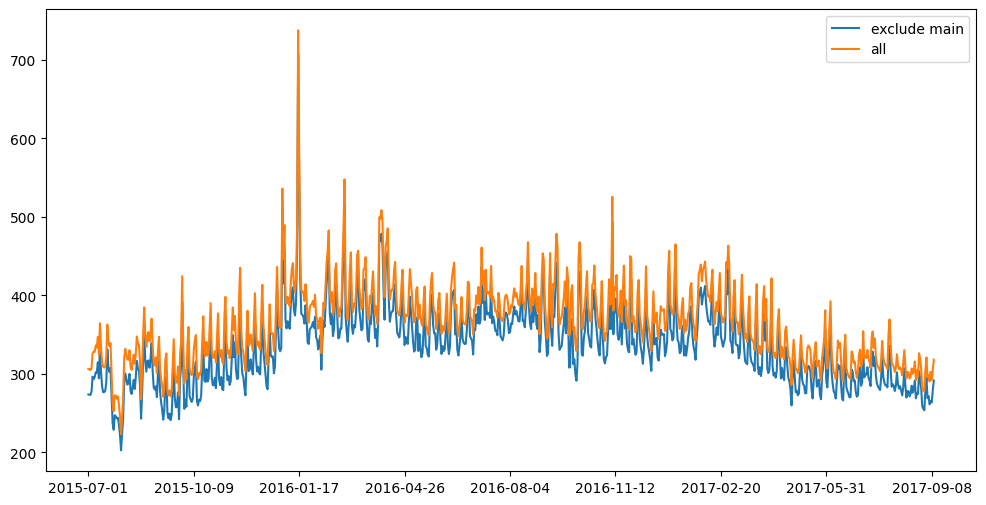

In [16]:
mask_zh = df_train["Page"].str.contains('_zh\.')
mask_special_main = df_train['Page'].str.contains('首页')

plt.figure(figsize=(12, 6))
time_cols = miscel_tool.extract_time_column_name(df_train)
df_train.loc[~mask_special_main & mask_zh, time_cols].mean().plot(label='exclude main')
# df_train.loc[mask_special_main & mask_zh, time_cols].mean().plot(label='only main and special')
df_train.loc[mask_zh, time_cols].mean().plot(label='all')
plt.legend()
plt.show()

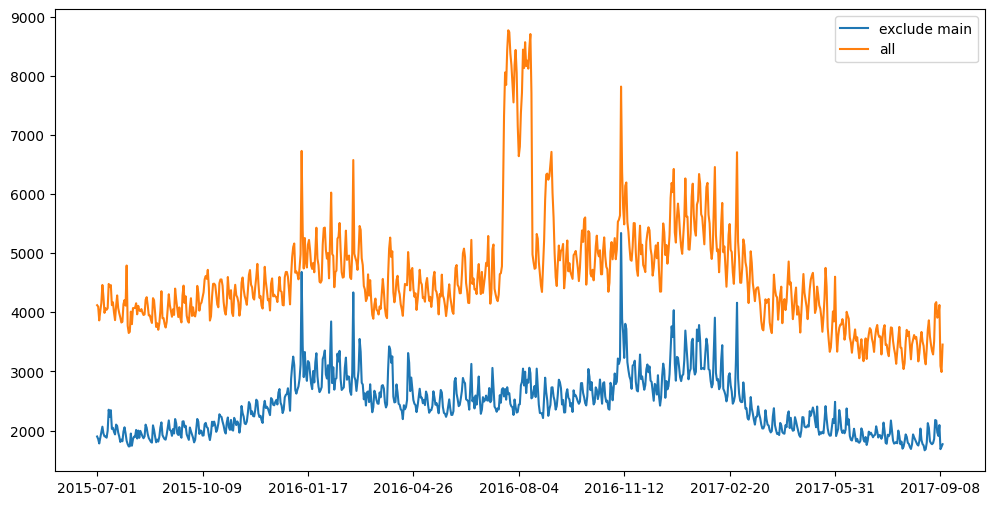

In [11]:
mask_en = df_train["Page"].str.contains('_en\.')
mask_special_main = df_train['Page'].str.contains('Main_Page|Special:')

plt.figure(figsize=(12, 6))
time_cols = miscel_tool.extract_time_column_name(df_train)
df_train.loc[~mask_special_main & mask_en, time_cols].mean().plot(label='exclude main')
# df_train.loc[mask_special_main & mask_en, time_cols].mean().plot(label='only main and special')
df_train.loc[mask_en, time_cols].mean().plot(label='all')
plt.legend()
plt.show()


# total

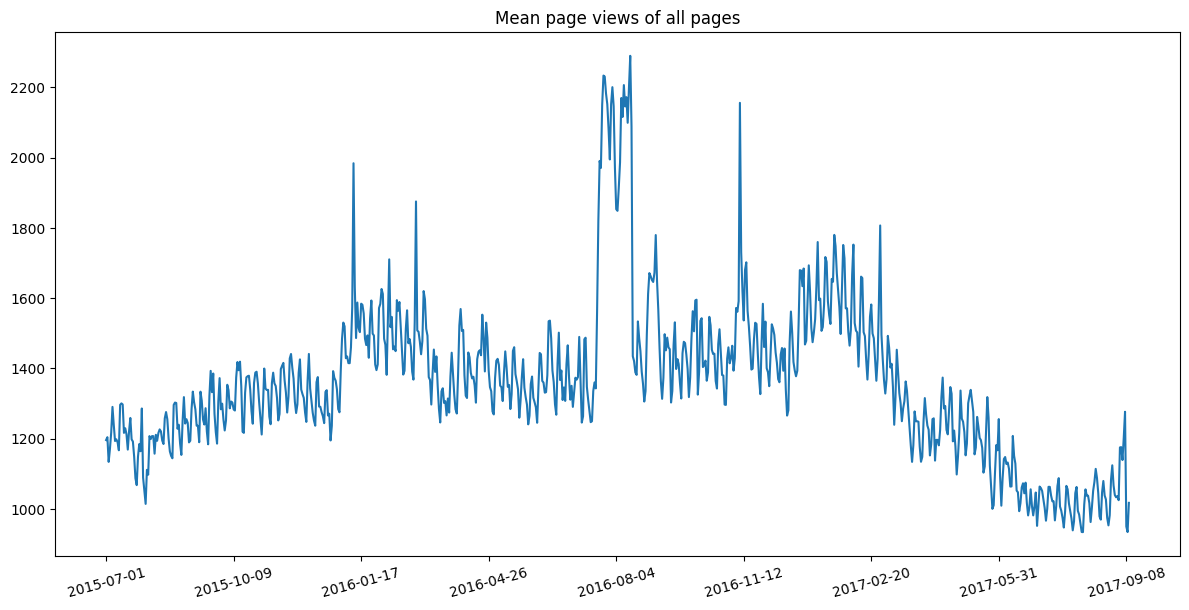

In [74]:
col_time = miscel_tool.extract_time_column_name(df_train)
plt.figure(figsize=(12, 6))
df_train[col_time].mean().plot()
plt.title('Mean page views of all pages')
plt.tight_layout()
plt.xticks(rotation=15)
plt.savefig('fig/mean_all_pages.png')
plt.show()

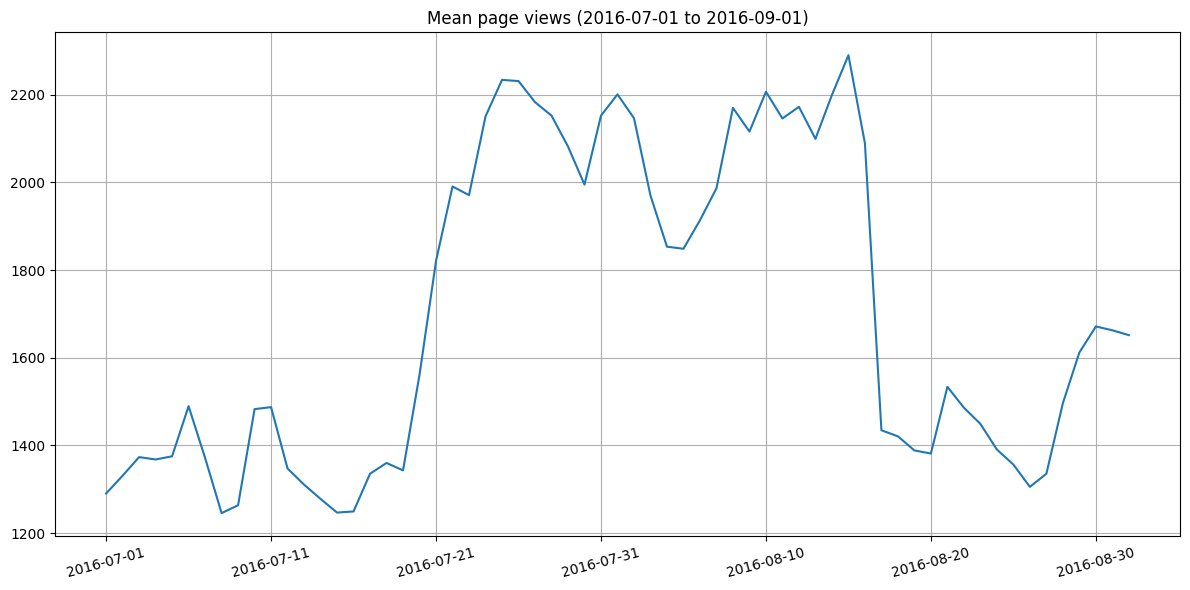

In [49]:
start_time = '2016-07-01'
end_time = '2016-09-01'
col_time = miscel_tool.extract_time_column_name(df_train)
col_interval = col_time[(col_time >= start_time) & (col_time <= end_time)]
plt.figure(figsize=(12, 6))
df_train[col_interval].mean().plot()
plt.title(f'Mean page views ({start_time} to {end_time})')
plt.xticks(rotation=15)
plt.grid()
plt.tight_layout()
plt.savefig(f'fig/mean_all_{start_time}_to_{end_time}.png')
plt.show()

# project

In [41]:
df_train['project'].value_counts()

en.wikipedia.org         24108
ja.wikipedia.org         20431
de.wikipedia.org         18547
fr.wikipedia.org         17802
zh.wikipedia.org         17229
ru.wikipedia.org         15022
es.wikipedia.org         14069
commons.wikimedia.org    10555
www.mediawiki.org         7300
Name: project, dtype: int64

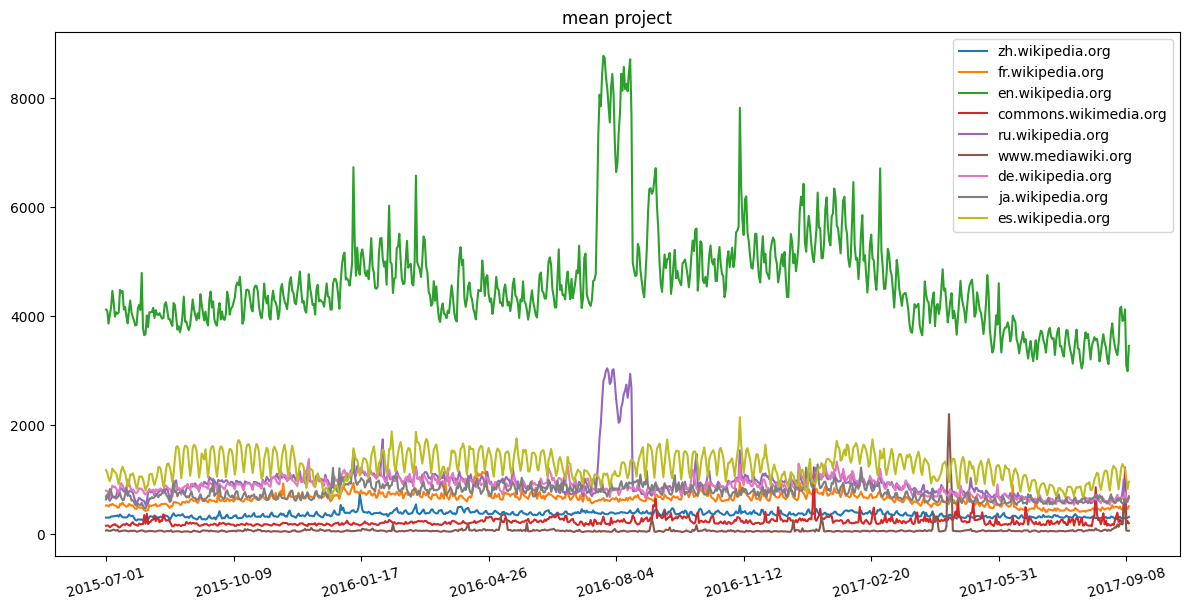

In [42]:
col_time = miscel_tool.extract_time_column_name(df_train)
project_name = df_train['project'].unique()

plt.figure(figsize=(12, 6))
for pn in project_name:
    mask_project = df_train['project'] == pn
    df_train.loc[mask_project, col_time].mean().plot(label=pn)
plt.legend()
plt.title('mean project')
plt.tight_layout()
plt.xticks(rotation=15)
plt.savefig('fig/mean_project.png')
plt.show()


# language

In [43]:
col_time = miscel_tool.extract_time_column_name(df_train)
mask_language = df_train['project'].str.contains('\w{2}\.wikipedia')
language_name = df_train.loc[mask_language, 'project'].unique()
language_name

array(['zh.wikipedia.org', 'fr.wikipedia.org', 'en.wikipedia.org',
       'ru.wikipedia.org', 'de.wikipedia.org', 'ja.wikipedia.org',
       'es.wikipedia.org'], dtype=object)

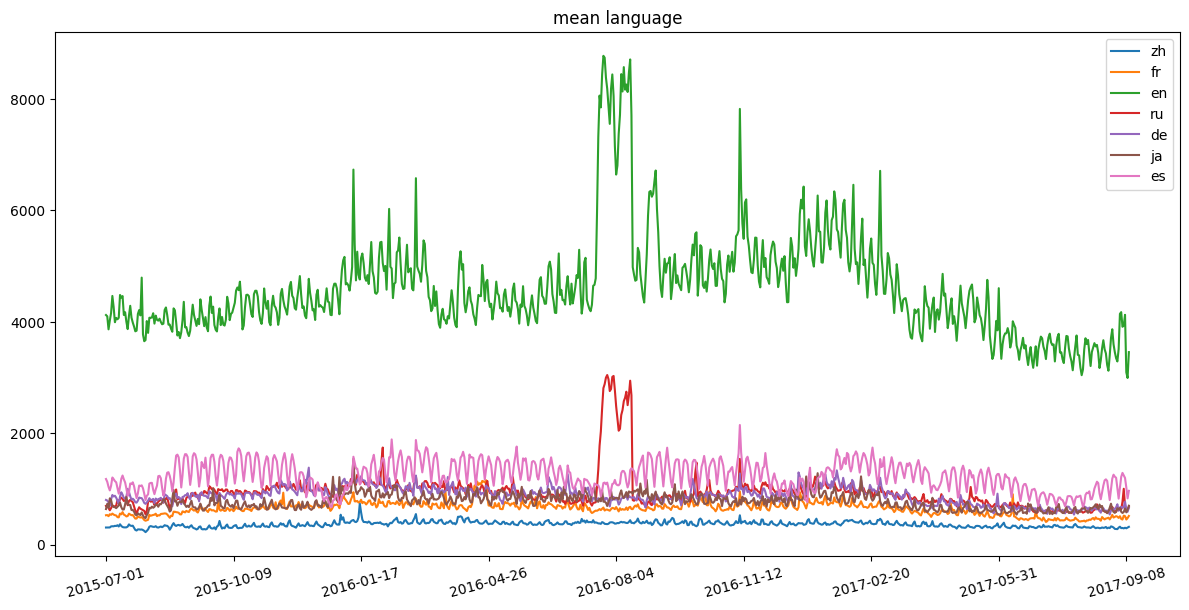

In [44]:
plt.figure(figsize=(12, 6))
for lang in language_name:
    mask_one_lang = df_train['project'].str.contains(lang)
    df_train.loc[mask_one_lang, col_time].mean().plot(label=lang[:2])
plt.legend()
plt.title('mean language')
plt.tight_layout()
plt.xticks(rotation=15)
plt.savefig('fig/mean_language.png')
plt.show()

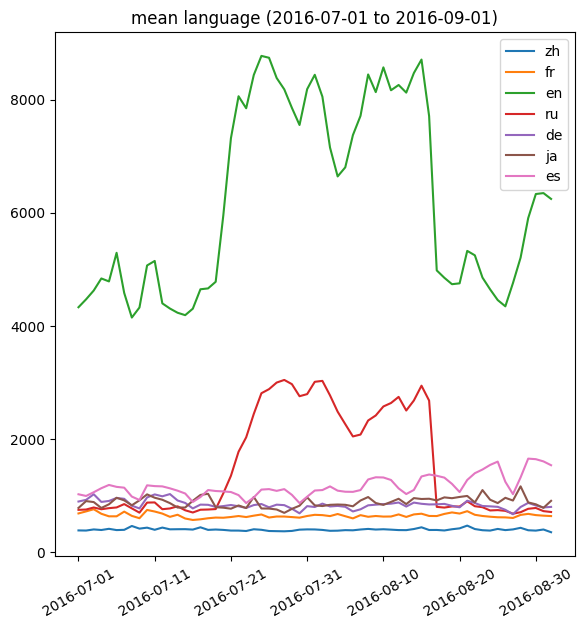

In [79]:
start_time = '2016-07-01'
end_time = '2016-09-01'
col_time = miscel_tool.extract_time_column_name(df_train)
col_interval = col_time[(col_time >= start_time) & (col_time <= end_time)]

plt.figure(figsize=(6, 6))
for lang in language_name:
    mask_one_lang = df_train['project'].str.contains(lang)
    df_train.loc[mask_one_lang, col_interval].mean().plot(label=lang[:2])
plt.legend()
plt.title(f'mean language ({start_time} to {end_time})')
plt.tight_layout()
plt.xticks(rotation=30)
plt.savefig(f'fig/mean_language_{start_time}_{end_time}.png')
plt.show()

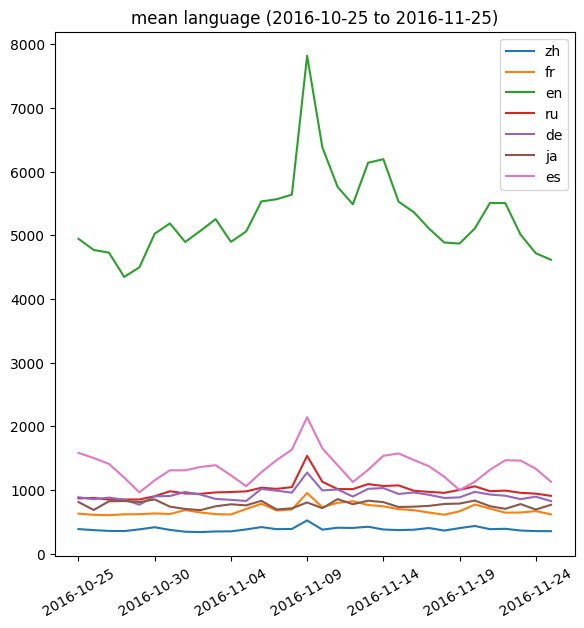

In [75]:
start_time = '2016-10-25'
end_time = '2016-11-25'
col_time = miscel_tool.extract_time_column_name(df_train)
col_interval = col_time[(col_time >= start_time) & (col_time <= end_time)]

plt.figure(figsize=(6, 6))
for lang in language_name:
    mask_one_lang = df_train['project'].str.contains(lang)
    df_train.loc[mask_one_lang, col_interval].mean().plot(label=lang[:2])
plt.legend()
plt.title(f'mean language ({start_time} to {end_time})')
plt.tight_layout()
plt.xticks(rotation=30)
plt.savefig(f'fig/mean_language_{start_time}_{end_time}.png')
plt.show()

# device and agent

In [87]:
df_train[['device', 'agent']].value_counts()

device      agent     
all-access  all-agents    39402
mobile-web  all-agents    35939
all-access  spider        34913
desktop     all-agents    34809
dtype: int64

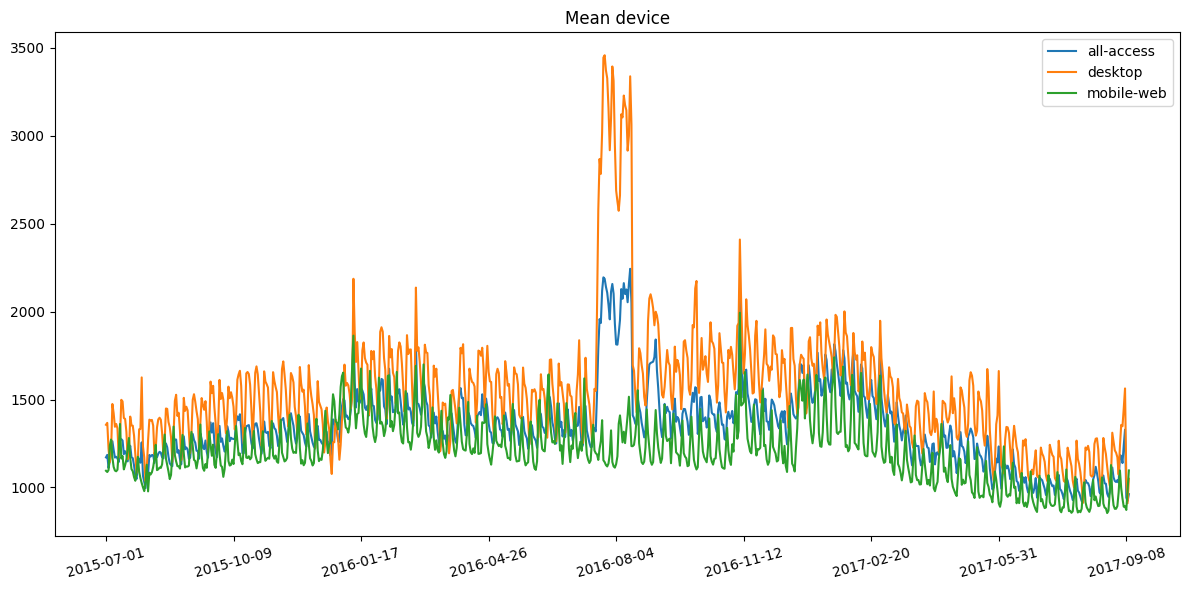

In [91]:
miscel_tool.plot_unique_value_mean(df_train, 'device', save_path='fig/mean_device.png')

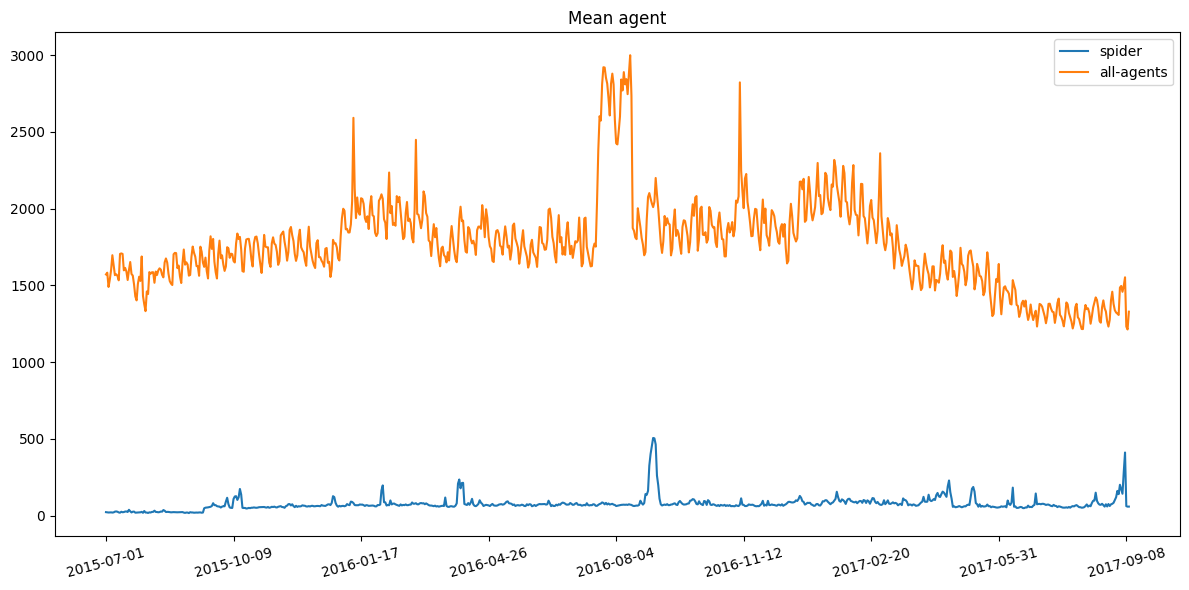

In [90]:
miscel_tool.plot_unique_value_mean(df_train, 'agent', save_path='fig/mean_agent.png')

# Read topic data

In [30]:
data_path = 'train_2_topic_and_time.csv'
df_en = pd.read_csv(data_path)
df_en.head()

,Page,title,topic,score,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,!vote_en.wikipedia.org_desktop_all-agents,!vote,Philosophy and thinking,0.179978,3.0,4.0,7.0,4.0,4.0,2.0,...,8.0,6.0,4.0,5.0,4.0,2.0,2.0,9.0,3.0,3.0
1,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...","""Awaken,_My_Love!""",Art and culture,0.166252,NaN,NaN,NaN,NaN,NaN,NaN,...,608.0,551.0,582.0,631.0,617.0,684.0,649.0,640.0,498.0,546.0
2,"""European_Society_for_Clinical_Investigation""_...","""European_Society_for_Clinical_Investigation""",Social sciences and society,0.531681,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
3,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...","""Weird_Al""_Yankovic",Art and culture,0.183592,2403.0,20136.0,1850.0,1432.0,1351.0,1792.0,...,1336.0,1106.0,1309.0,1334.0,1381.0,1370.0,2041.0,1381.0,1084.0,1157.0
4,100_metres_en.wikipedia.org_desktop_all-agents,100_metres,History and events,0.155705,982.0,881.0,794.0,979.0,1191.0,1057.0,...,436.0,374.0,422.0,467.0,641.0,525.0,490.0,580.0,539.0,496.0


## plot en topic

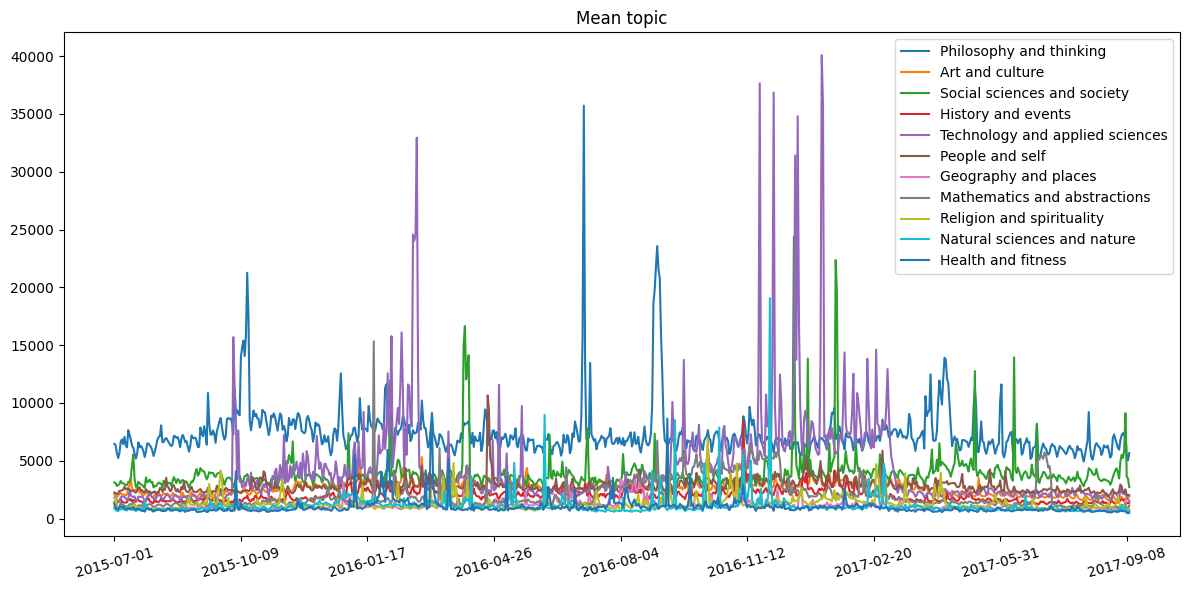

In [93]:
df_exclude_null = df_en[df_en['topic'] != '-1']
miscel_tool.plot_unique_value_mean(df_exclude_null, col_name='topic', save_path=None)

## check en topic not found

In [94]:
mask_none = df_en['topic'] == '-1'

In [95]:
time_cols = miscel_tool.extract_time_column_name(df_en)
series_total = df_en[time_cols].mean()
series_miss = df_en.loc[mask_none, time_cols].mean()
series_remain = df_en.loc[~mask_none, time_cols].mean()

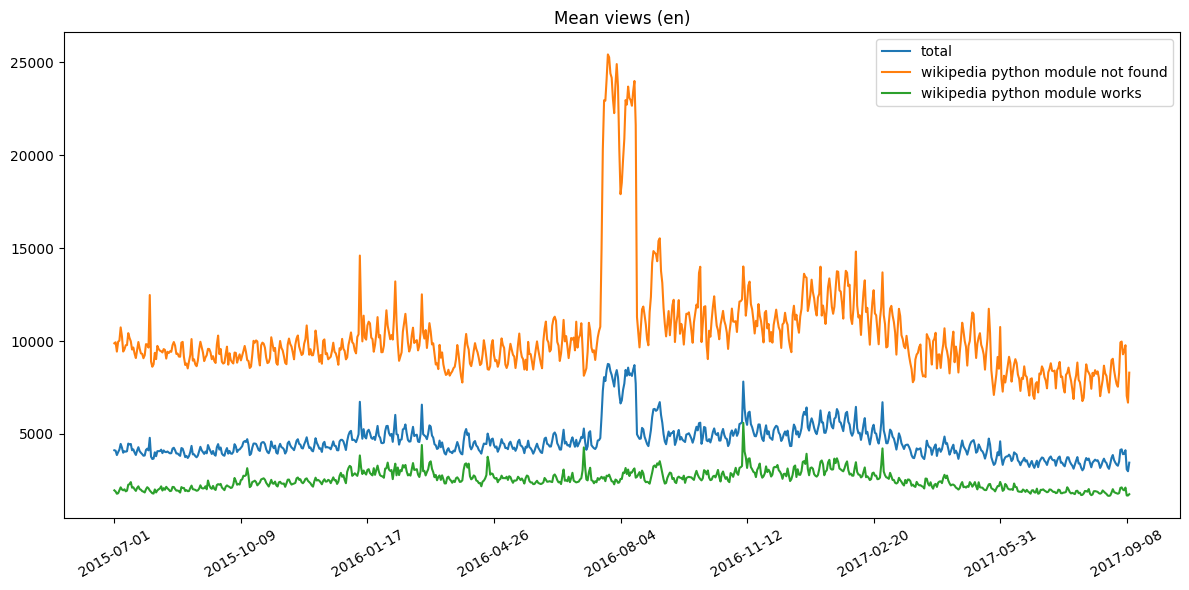

In [96]:
plt.figure(figsize=(12, 6))
series_total.plot(label='total')
series_miss.plot(label='wikipedia python module not found')
series_remain.plot(label='wikipedia python module works')
plt.title('Mean views (en)')
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

# peak time

In [53]:
col_time = miscel_tool.extract_time_column_name(df_train)
time_sort = df_train[col_time].mean().sort_values(ascending=False)
time_sort.iloc[:35]

2016-08-15    2289.932620
2016-07-25    2233.685542
2016-07-26    2230.959181
2016-08-10    2206.600550
2016-08-01    2200.686910
2016-08-14    2199.267491
2016-07-27    2182.907348
2016-08-12    2172.227026
2016-08-08    2169.872416
2016-11-09    2156.054809
2016-07-28    2152.181164
2016-07-31    2152.132863
2016-07-24    2150.465579
2016-08-02    2146.367251
2016-08-11    2145.729030
2016-08-09    2115.805621
2016-08-13    2099.253863
2016-08-16    2088.987844
2016-07-29    2081.780143
2016-07-30    1994.864349
2016-07-22    1990.606519
2016-08-07    1986.485134
2016-01-11    1984.018622
2016-07-23    1970.823462
2016-08-03    1969.978694
2016-08-06    1913.543523
2016-02-29    1875.228639
2016-08-04    1853.285140
2016-08-05    1848.542643
2016-07-21    1820.844399
2017-02-27    1806.859110
2017-01-22    1780.030941
2016-09-04    1779.603062
2017-01-09    1759.674128
2017-02-06    1752.329649
dtype: float64

## Peak 2016-11-09

### overall peak

In [24]:
df_1109_sort = df_train.sort_values(by='2016-11-09', ascending=False)
df_1109_sort[['title', 'project', 'device', 'agent', '2016-11-09']].head(30)

,title,project,device,agent,2016-11-09
38573,Main_Page,en.wikipedia.org,all-access,all-agents,25299803.0
9774,Main_Page,en.wikipedia.org,desktop,all-agents,19986696.0
41072,Donald_Trump,en.wikipedia.org,all-access,all-agents,6137438.0
74114,Main_Page,en.wikipedia.org,mobile-web,all-agents,5236433.0
73348,Donald_Trump,en.wikipedia.org,mobile-web,all-agents,3452497.0
139119,Wikipedia:Hauptseite,de.wikipedia.org,all-access,all-agents,2900022.0
8972,Donald_Trump,en.wikipedia.org,desktop,all-agents,2618353.0
40841,"United_States_presidential_election,_2016",en.wikipedia.org,all-access,all-agents,2371810.0
39180,Special:Search,en.wikipedia.org,all-access,all-agents,2102357.0
39998,Electoral_College_(United_States),en.wikipedia.org,all-access,all-agents,1928256.0


### by language

In [42]:
result = miscel_tool.sort_by_attr_on_date(df_train, 'project', on_date='2016-11-09', topk=15)
for project, vals in result.items():
    print(project)
    print(vals[['title', '2016-11-09']], '\n')

zh.wikipedia.org
               title  2016-11-09
29393         唐納德·川普    416176.0
28296    2016年美國總統選舉    303015.0
28727   Wikipedia:首页    268313.0
62004         唐納德·川普    232753.0
106441        唐納德·川普    181333.0
30828         美国选举人团    175472.0
61671    2016年美國總統選舉    162295.0
106183   2016年美國總統選舉    136612.0
61350   Wikipedia:首页    135930.0
105844  Wikipedia:首页    128876.0
63376         美国选举人团     99561.0
28728     Special:搜索     94454.0
29125         美国总统选举     93873.0
61351     Special:搜索     93601.0
29761        希拉里·克林顿     75058.0 

fr.wikipedia.org
                                            title  2016-11-09
27330                 Wikipédia:Accueil_principal   1491740.0
25870                                Donald_Trump    945256.0
55104                 Wikipédia:Accueil_principal    912289.0
7344                  Wikipédia:Accueil_principal    567889.0
53516                                Donald_Trump    550210.0
6389                                 Donald_Trump    384342.0
26

### by device

In [44]:
result = miscel_tool.sort_by_attr_on_date(df_train, 'device', on_date='2016-11-09', topk=15)
for device, vals in result.items():
    print(device)
    print(vals[['title', 'project', '2016-11-09']], '\n')

all-access
                                            title           project  \
38573                                   Main_Page  en.wikipedia.org   
41072                                Donald_Trump  en.wikipedia.org   
139119                       Wikipedia:Hauptseite  de.wikipedia.org   
40841   United_States_presidential_election,_2016  en.wikipedia.org   
39180                              Special:Search  en.wikipedia.org   
39998           Electoral_College_(United_States)  en.wikipedia.org   
41938                               Melania_Trump  en.wikipedia.org   
27330                 Wikipédia:Accueil_principal  fr.wikipedia.org   
100861                             Трамп,_Дональд  ru.wikipedia.org   
99322                          Заглавная_страница  ru.wikipedia.org   
40840   United_States_presidential_election,_2012  en.wikipedia.org   
92205                           Wikipedia:Portada  es.wikipedia.org   
41149                             Hillary_Clinton  en.wikipedia.or

### by agent

In [45]:
result = miscel_tool.sort_by_attr_on_date(df_train, 'agent', on_date='2016-11-09', topk=15)
for device, vals in result.items():
    print(device)
    print(vals[['title', 'agent', '2016-11-09']], '\n')

spider
                              title   agent  2016-11-09
33644                     Main_Page  spider    428763.0
34257                Special:Search  spider    137501.0
131296  Wikipédia:Accueil_principal  spider    100897.0
143440            Wikipedia:Portada  spider     56087.0
132206                    ドナルド・トランプ  spider     42037.0
34249                  Special:Book  spider     33404.0
35753         Special:RecentChanges  spider     30404.0
34251         Special:CreateAccount  spider     25724.0
50030          Wikipedia:Hauptseite  spider     23750.0
14571         Special:CreateAccount  spider     22023.0
141951                  Dragon_Ball  spider     19452.0
14542                     Main_Page  spider     19091.0
34250          Special:CiteThisPage  spider     18190.0
14591          Special:UploadWizard  spider     16847.0
133589                       メインページ  spider     12811.0 

all-agents
                                            title       agent  2016-11-09
38573     

## peak 2016-07-21

In [54]:
df_0721_sort = df_train.sort_values(by='2016-07-21', ascending=False)
df_0721_sort[['title', 'project', 'device', 'agent', '2016-07-21']].head(30)

,title,project,device,agent,2016-07-21
38573,Main_Page,en.wikipedia.org,all-access,all-agents,51192572.0
9774,Main_Page,en.wikipedia.org,desktop,all-agents,46255825.0
99322,Заглавная_страница,ru.wikipedia.org,all-access,all-agents,5420138.0
103123,Заглавная_страница,ru.wikipedia.org,desktop,all-agents,4903775.0
74114,Main_Page,en.wikipedia.org,mobile-web,all-agents,4754483.0
139119,Wikipedia:Hauptseite,de.wikipedia.org,all-access,all-agents,2704544.0
39180,Special:Search,en.wikipedia.org,all-access,all-agents,2309459.0
116196,Wikipedia:Hauptseite,de.wikipedia.org,mobile-web,all-agents,1892476.0
10403,Special:Search,en.wikipedia.org,desktop,all-agents,1836326.0
27330,Wikipédia:Accueil_principal,fr.wikipedia.org,all-access,all-agents,1599322.0


### check en, ru

In [56]:
check_list = ['en', 'ru']
for lang in check_list:
    mask_0721_lang = df_train['project'].str.contains(lang)
    df_0721_lang_sort = df_train[mask_0721_lang].sort_values(by='2016-07-21', ascending=False)
    print(df_0721_lang_sort.iloc[:20][['title', '2016-07-21']])

                title  2016-07-21
38573       Main_Page  51192572.0
9774        Main_Page  46255825.0
74114       Main_Page   4754483.0
39180  Special:Search   2309459.0
10403  Special:Search   1836326.0
39270        Tanghulu    662010.0
10488        Tanghulu    661579.0
74690  Special:Search    472916.0
41072    Donald_Trump    453906.0
41938   Melania_Trump    333454.0
38653      Mike_Pence    330406.0
38204    Ivanka_Trump    323925.0
73348    Donald_Trump    268005.0
42092      Pokémon_Go    249175.0
74202      Mike_Pence    247722.0
38338   Kabali_(film)    231779.0
37887      Eric_Trump    226187.0
75643    Ivanka_Trump    221596.0
39172    Special:Book    220177.0
10399    Special:Book    219078.0
                               title  2016-07-21
99322             Заглавная_страница   5420138.0
103123            Заглавная_страница   4903775.0
17670             Заглавная_страница    491175.0
99537                Служебная:Поиск    133672.0
103349               Служебная:Поиск    1

## peak 2016-07-25

這天發生什麼事我看不出來

In [57]:
df_0725_sort = df_train.sort_values(by='2016-07-25', ascending=False)
df_0725_sort[['title', 'project', 'device', 'agent', '2016-07-25']].head(30)

,title,project,device,agent,2016-07-25
38573,Main_Page,en.wikipedia.org,all-access,all-agents,67122896.0
9774,Main_Page,en.wikipedia.org,desktop,all-agents,62174277.0
99322,Заглавная_страница,ru.wikipedia.org,all-access,all-agents,16226765.0
103123,Заглавная_страница,ru.wikipedia.org,desktop,all-agents,15713603.0
74114,Main_Page,en.wikipedia.org,mobile-web,all-agents,4762513.0
139119,Wikipedia:Hauptseite,de.wikipedia.org,all-access,all-agents,2765875.0
39180,Special:Search,en.wikipedia.org,all-access,all-agents,2310092.0
116196,Wikipedia:Hauptseite,de.wikipedia.org,mobile-web,all-agents,1900428.0
10403,Special:Search,en.wikipedia.org,desktop,all-agents,1875514.0
27330,Wikipédia:Accueil_principal,fr.wikipedia.org,all-access,all-agents,1615350.0


In [59]:
check_list = ['en', 'ru']
for lang in check_list:
    mask_0725_lang = df_train['project'].str.contains(lang)
    df_0725_lang_sort = df_train[mask_0725_lang].sort_values(by='2016-07-25', ascending=False)
    print(df_0725_lang_sort.iloc[:20][['title', '2016-07-25']])

                                       title  2016-07-25
38573                              Main_Page  67122896.0
9774                               Main_Page  62174277.0
74114                              Main_Page   4762513.0
39180                         Special:Search   2310092.0
10403                         Special:Search   1875514.0
74690                         Special:Search    434343.0
37480                    Battleground_(2016)    412359.0
73014                    Battleground_(2016)    266082.0
37759               Debbie_Wasserman_Schultz    254213.0
38338                          Kabali_(film)    238991.0
39172                           Special:Book    221126.0
10399                           Special:Book    220011.0
40501                                   Okto    210633.0
9649   List_of_Intel_Core_i5_microprocessors    205612.0
38915                            Proyecto_40    205224.0
11712                                   Okto    204475.0
10158                          

## peak 2016-08-15

In [60]:
df_0815_sort = df_train.sort_values(by='2016-08-15', ascending=False)
df_0815_sort[['title', 'project', 'device', 'agent', '2016-08-15']].head(30)

,title,project,device,agent,2016-08-15
38573,Main_Page,en.wikipedia.org,all-access,all-agents,63052818.0
9774,Main_Page,en.wikipedia.org,desktop,all-agents,58283418.0
99322,Заглавная_страница,ru.wikipedia.org,all-access,all-agents,16225947.0
103123,Заглавная_страница,ru.wikipedia.org,desktop,all-agents,15706103.0
74114,Main_Page,en.wikipedia.org,mobile-web,all-agents,4674707.0
139119,Wikipedia:Hauptseite,de.wikipedia.org,all-access,all-agents,2641617.0
39180,Special:Search,en.wikipedia.org,all-access,all-agents,2328828.0
10403,Special:Search,en.wikipedia.org,desktop,all-agents,1880533.0
116196,Wikipedia:Hauptseite,de.wikipedia.org,mobile-web,all-agents,1866299.0
27330,Wikipédia:Accueil_principal,fr.wikipedia.org,all-access,all-agents,1551467.0


In [61]:
check_list = ['en', 'ru']
for lang in check_list:
    mask_0815_lang = df_train['project'].str.contains(lang)
    df_0815_lang_sort = df_train[mask_0815_lang].sort_values(by='2016-08-15', ascending=False)
    print(df_0815_lang_sort.iloc[:20][['title', '2016-08-15']])

                      title  2016-08-15
38573             Main_Page  63052818.0
9774              Main_Page  58283418.0
74114             Main_Page   4674707.0
39180        Special:Search   2328828.0
10403        Special:Search   1880533.0
41496            Usain_Bolt   1080495.0
76949            Usain_Bolt    772720.0
40251         Justin_Gatlin    477279.0
74690        Special:Search    448068.0
75715         Justin_Gatlin    352748.0
41288        Michael_Phelps    337770.0
41530  2016_Summer_Olympics    323310.0
37325      Albus_Dumbledore    315920.0
12762            Usain_Bolt    279385.0
40869     Wayde_van_Niekerk    271741.0
8485       Albus_Dumbledore    260408.0
37290                 AMGTV    232358.0
39237  Suicide_Squad_(film)    226792.0
76748        Michael_Phelps    223314.0
8451                  AMGTV    219844.0
                                title  2016-08-15
99322              Заглавная_страница  16225947.0
103123             Заглавная_страница  15706103.0
17670     

## Mean 0721 to 0815

In [85]:
start_time = '2016-07-21'
end_time = '2016-08-16'
col_time = miscel_tool.extract_time_column_name(df_train)
col_peak = col_time[(col_time >= start_time) & (col_time <= end_time)]
df_train['peak_78'] = df_train[col_peak].mean(axis=1)

df_sort = df_train.sort_values(by='peak_78', ascending=False)
df_sort[['title', 'project', 'device', 'agent', 'peak_78']].head(30)

,title,project,device,agent,peak_78
38573,Main_Page,en.wikipedia.org,all-access,all-agents,5.902940e+07
9774,Main_Page,en.wikipedia.org,desktop,all-agents,5.413666e+07
99322,Заглавная_страница,ru.wikipedia.org,all-access,all-agents,1.409840e+07
103123,Заглавная_страница,ru.wikipedia.org,desktop,all-agents,1.358636e+07
74114,Main_Page,en.wikipedia.org,mobile-web,all-agents,4.763874e+06
139119,Wikipedia:Hauptseite,de.wikipedia.org,all-access,all-agents,2.598091e+06
39180,Special:Search,en.wikipedia.org,all-access,all-agents,2.179465e+06
116196,Wikipedia:Hauptseite,de.wikipedia.org,mobile-web,all-agents,1.882854e+06
10403,Special:Search,en.wikipedia.org,desktop,all-agents,1.742988e+06
27330,Wikipédia:Accueil_principal,fr.wikipedia.org,all-access,all-agents,1.562825e+06


In [86]:
check_list = ['en', 'ru']
for lang in check_list:
    mask_lang = df_train['project'].str.contains(lang)
    df_lang_sort = df_train[mask_lang].sort_values(by='peak_78', ascending=False)
    print(df_lang_sort.iloc[:20][['title', 'peak_78']])

                             title       peak_78
38573                    Main_Page  5.902940e+07
9774                     Main_Page  5.413666e+07
74114                    Main_Page  4.763874e+06
39180               Special:Search  2.179465e+06
10403               Special:Search  1.742988e+06
74690               Special:Search  4.362142e+05
41288               Michael_Phelps  3.054747e+05
39237         Suicide_Squad_(film)  2.626911e+05
76748               Michael_Phelps  2.195987e+05
40501                         Okto  2.121037e+05
41530         2016_Summer_Olympics  2.096428e+05
38915                  Proyecto_40  2.079830e+05
11712                         Okto  2.058694e+05
10158                  Proyecto_40  2.022395e+05
39637                     XHamster  1.935519e+05
75127                     XHamster  1.841218e+05
39172                 Special:Book  1.813184e+05
10399                 Special:Book  1.805857e+05
39236  Stranger_Things_(TV_series)  1.568650e+05
74744         Suicid